In [3]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import math
import os

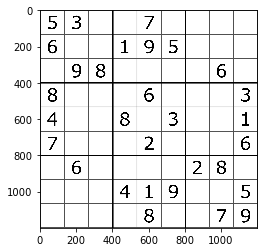

In [7]:
sudoku_img = cv.imread("sudoku1.png")
plt.imshow(sudoku_img)

In [3]:
# #run hough line transform over the image
# gray = cv.cvtColor(sudoku_img,cv.COLOR_BGR2GRAY)
# ret, thresh = cv.threshold(gray,240,255,cv.THRESH_BINARY)
# thresh = cv.bitwise_not(thresh)

# accumulator_threshold = 300
# minLineLength = 800
# maxLineGap = 20
# lines = cv.HoughLinesP(thresh, rho = 1, theta = np.pi/180, threshold = accumulator_threshold, 
#                             minLineLength = minLineLength, maxLineGap = maxLineGap)
# np.seterr(divide='ignore', invalid='ignore')

# color = [0,0,255]
# new_img = sudoku_img.copy()
# for ele in lines:
#     new_img = cv.line(new_img,(ele[0][0],ele[0][1]),(ele[0][2],ele[0][3]),color,9)

# print(len(lines))
# plt.imshow(new_img)

In [4]:
# #if there are lines at a gap of 30 pixels, merge them  ----- why though?

# line_df = []
# for ele in lines:
#     line_df.append(ele[0])
    
# line_df = pd.DataFrame(line_df, columns = ['xmin','ymin','xmax','ymax'])
# line_df = line_df.sort_values(by=['xmin','ymin','xmax','ymax'])

# def get_orientation(index, line_df):
#     if abs(line_df.iloc[index][0] - line_df.iloc[index][2]) < 5:
#         return 90
#     elif abs(line_df.iloc[index][1] - line_df.iloc[index][3]) < 5:
#         return 0

# def remove_repetitive_lines(ls_df):
#     for index, row in ls_df.iterrows():
#         for index1, row1 in ls_df.iterrows():
#             if row.equals(row1)==False:
#                 if abs(int(row['xmin'])-int(row1['xmin']))<=10 and abs(int(row['xmax'])-int(row1['xmax']))<=10: #if both lines are in same plane
#                     if int(row1['ymin'])>(int(row['ymin'])) and int(row1['ymax'])<(int(row['ymax'])):
#                         if index1 in ls_df.index.values:
#                             ls_df = ls_df.drop(index1, axis=0)
            
#                 if abs(int(row['ymin'])-int(row1['ymin']))<=10 and abs(int(row['ymax'])-int(row1['ymax']))<=10: #if both lines are in same plane
#                     if int(row1['xmin'])>(int(row['xmin'])) and int(row1['xmax'])<(int(row['xmax'])):
#                         if index1 in ls_df.index.values:
#                             ls_df = ls_df.drop(index1, axis=0)
                        
#     return ls_df

# def merge_lines(line_df):
#     last_index = len(line_df)
#     for index, row in line_df.iterrows():
#         for index1, row1 in line_df.iterrows():
#             if get_orientation(index,line_df)==get_orientation(index1,line_df)==0:
#                 if abs(line_df.iloc[index][2] - line_df.iloc[index1][0]) <=30 :
#                     line_df.at[last_index] = [line_df.iloc[index][0],line_df.iloc[index][1],line_df.iloc[index1][2],line_df.iloc[index][3]]
#                     last_index+=1
#                     line_df = line_df.drop([index,index1],axis=0)
#             elif get_orientation(index,line_df)==get_orientation(index1,line_df)==90:
#                 if abs(line_df.iloc[index][3] - line_df.iloc[index1][1]) <=30 :
#                     line_df.at[last_index] = [line_df.iloc[index][0],line_df.iloc[index][1],line_df.iloc[index][2],line_df.iloc[index1][3]]
#                     last_index+=1
#                     line_df = line_df.drop([index,index1],axis=0)
#     return line_df

# # line_df_mod = merge_lines(line_df)
# line_df_mod = remove_repetitive_lines(line_df)

In [5]:
# line_df_mod

In [6]:
# color = [0,0,255]
# new_img = sudoku_img.copy()
# for index, row in line_df_mod.iterrows():
#     new_img = cv.line(new_img,(row['xmin'],row['ymin']),(row['xmax'],row['ymax']),color,9)

# # print(len(lines))
# plt.imshow(new_img)

In [8]:
#crop 81 images for each box and save the image
gray = cv.cvtColor(sudoku_img,cv.COLOR_BGR2GRAY)
w,h = gray.shape
width = math.floor(w/9)
height = math.floor(h/9)
gray = gray[0:width*9,0:height*9]
counter_x = 0
for i in range(0,w-width,width):
    counter_y = 0
    for j in range(0,h-height,height):
        crop = gray[i:i+width,j:j+height]
        cv.imwrite("crop_img/crop_"+str(counter_x)+str(counter_y)+".png",crop)
        counter_y += 1
    counter_x += 1
        

In [18]:
reconstructed_model =  keras.models.load_model("digit_recognizer_best_model.h5")
res_arr = np.zeros([9,9],dtype=int)
for filename in os.listdir('crop_img'):
    
    test_image = Image.open('crop_img/'+filename)
    test_image_resized = test_image.resize((28,28))

    test_image_resized.save('temp/resized.png')
    test_image_resized = cv2.imread('temp/resized.png')
    test_image_resized_gray = cv2.cvtColor(test_image_resized,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(test_image_resized_gray,140,255,cv2.THRESH_BINARY)
    nonZero = cv2.countNonZero(thresh)
    #plt.imshow(thresh)
    if nonZero/784 >0.9:
        res = int(0)
    else:
        bitwise_thresh = cv2.bitwise_not(thresh)
        bitwise = bitwise_thresh.reshape([-1,28, 28,1])
        res = np.argmax(reconstructed_model.predict(bitwise)) 
    
    index = list(filename[5:-4])
    res_arr[int(index[0]),int(index[1])] = int(res)

In [19]:
#create an array for each image as shown below
res_arr

array([[5, 3, 0, 0, 3, 0, 0, 0, 0],
       [6, 0, 0, 8, 9, 5, 0, 0, 0],
       [0, 9, 8, 0, 0, 0, 0, 6, 0],
       [8, 0, 0, 0, 6, 0, 0, 0, 3],
       [4, 0, 0, 8, 0, 3, 0, 0, 8],
       [3, 0, 0, 0, 2, 0, 0, 0, 6],
       [0, 6, 0, 0, 0, 0, 2, 8, 0],
       [0, 0, 0, 4, 8, 9, 0, 0, 5],
       [0, 0, 0, 0, 8, 0, 0, 3, 9]])

In [59]:
#this array is manually created
[[5,3,0,0,7,0,0,0,0]
 [6,0,0,1,9,5,0,0,0]
 [0,9,8,0,0,0,0,6,0]
 [8,0,0,0,6,0,0,0,3]
 [4,0,0,8,0,3,0,0,1]
 [7,0,0,0,2,0,0,0,6]
 [0,6,0,0,0,0,2,8,0]
 [0,0,0,4,1,9,0,0,5]
 [0,0,0,0,8,0,0,7,9]]

In [ ]:
#solve the sudoku array

In [1]:
# solver.py

def solve(bo):
    find = find_empty(bo)
    if not find:
        return True
    else:
        row, col = find

    for i in range(1,10):
        if valid(bo, i, (row, col)):
            bo[row][col] = i

            if solve(bo):
                return True

            bo[row][col] = 0

    return False


def valid(bo, num, pos):
    # Check row
    for i in range(len(bo[0])):
        if bo[pos[0]][i] == num and pos[1] != i:
            return False

    # Check column
    for i in range(len(bo)):
        if bo[i][pos[1]] == num and pos[0] != i:
            return False

    # Check box
    box_x = pos[1] // 3
    box_y = pos[0] // 3

    for i in range(box_y*3, box_y*3 + 3):
        for j in range(box_x * 3, box_x*3 + 3):
            if bo[i][j] == num and (i,j) != pos:
                return False

    return True


def print_board(bo):
    for i in range(len(bo)):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - - - - ")

        for j in range(len(bo[0])):
            if j % 3 == 0 and j != 0:
                print(" | ", end="")

            if j == 8:
                print(bo[i][j])
            else:
                print(str(bo[i][j]) + " ", end="")


def find_empty(bo):
    for i in range(len(bo)):
        for j in range(len(bo[0])):
            if bo[i][j] == 0:
                return (i, j)  # row, col

    return None

In [20]:
bo = [[5,3,0,0,7,0,0,0,0],
 [6,0,0,1,9,5,0,0,0],
 [0,9,8,0,0,0,0,6,0],
 [8,0,0,0,6,0,0,0,3],
 [4,0,0,8,0,3,0,0,1],
 [7,0,0,0,2,0,0,0,6],
 [0,6,0,0,0,0,2,8,0],
 [0,0,0,4,1,9,0,0,5],
 [0,0,0,0,8,0,0,7,9]]

print_board(res_arr)
print("**********************************\n**********************************")
solve(res_arr)
print_board(res_arr)

5 3 0  | 0 3 0  | 0 0 0
6 0 0  | 8 9 5  | 0 0 0
0 9 8  | 0 0 0  | 0 6 0
- - - - - - - - - - - - - 
8 0 0  | 0 6 0  | 0 0 3
4 0 0  | 8 0 3  | 0 0 8
3 0 0  | 0 2 0  | 0 0 6
- - - - - - - - - - - - - 
0 6 0  | 0 0 0  | 2 8 0
0 0 0  | 4 8 9  | 0 0 5
0 0 0  | 0 8 0  | 0 3 9
**********************************
**********************************
5 3 0  | 0 3 0  | 0 0 0
6 0 0  | 8 9 5  | 0 0 0
0 9 8  | 0 0 0  | 0 6 0
- - - - - - - - - - - - - 
8 0 0  | 0 6 0  | 0 0 3
4 0 0  | 8 0 3  | 0 0 8
3 0 0  | 0 2 0  | 0 0 6
- - - - - - - - - - - - - 
0 6 0  | 0 0 0  | 2 8 0
0 0 0  | 4 8 9  | 0 0 5
0 0 0  | 0 8 0  | 0 3 9


In [25]:
# to check whether  
# given sudoku board is valid or not  
  
# Checks whether there is any  
# duplicate in current row or not  
def notInRow(arr, row):  
  
    # Set to store characters seen so far.  
    st = set()  
  
    for i in range(0, 9):  
  
        # If already encountered before,  
        # return false  
        if arr[row][i] in st:  
            return False
  
        # If it is not an empty cell, insert value  
        # at the current cell in the set  
        if arr[row][i] != 0:  
            st.add(arr[row][i])  
      
    return True
  
# Checks whether there is any  
# duplicate in current column or not.  
def notInCol(arr, col):  
  
    st = set()  
  
    for i in range(0, 9):  
  
        # If already encountered before, 
        # return false  
        if arr[i][col] in st: 
            return False
  
        # If it is not an empty cell, insert  
        # value at the current cell in the set  
        if arr[i][col] != 0:  
            st.add(arr[i][col])  
      
    return True
  
# Checks whether there is any duplicate  
# in current 3x3 box or not.  
def notInBox(arr, startRow, startCol):  
  
    st = set()  
  
    for row in range(0, 3):  
        for col in range(0, 3):  
            curr = arr[row + startRow][col + startCol]  
  
            # If already encountered before,  
            # return false  
            if curr in st:  
                return False
  
            # If it is not an empty cell,  
            # insert value at current cell in set  
            if curr != 0:  
                st.add(curr)  
          
    return True
  
# Checks whether current row and current  
# column and current 3x3 box is valid or not  
def isValid(arr, row, col):  
  
    return (notInRow(arr, row) and notInCol(arr, col) and
            notInBox(arr, row - row % 3, col - col % 3))  
  
def isValidConfig(arr, n):  
  
    for i in range(0, n):  
        for j in range(0, n):  
  
            # If current row or current column or  
            # current 3x3 box is not valid, return false  
            if not isValid(arr, i, j):  
                return False
          
    return True
  
        
if isValidConfig(res_arr, 9):  
    print("YES") 
else: 
    print("NO") 

NO


In [23]:
bo

[[5, 3, 0, 0, 7, 0, 0, 0, 0],
 [6, 0, 0, 1, 9, 5, 0, 0, 0],
 [0, 9, 8, 0, 0, 0, 0, 6, 0],
 [8, 0, 0, 0, 6, 0, 0, 0, 3],
 [4, 0, 0, 8, 0, 3, 0, 0, 1],
 [7, 0, 0, 0, 2, 0, 0, 0, 6],
 [0, 6, 0, 0, 0, 0, 2, 8, 0],
 [0, 0, 0, 4, 1, 9, 0, 0, 5],
 [0, 0, 0, 0, 8, 0, 0, 7, 9]]